# Data Analysis Report for Rice Leaf Disease Dataset Project using CNN

# Intoduction

This a project to build and train a CNN model with images of 3 classes of rice leaf diseases,namely,leaf smut, bacterial blight and brown spot.


# Dataset Overview:

Dataset contains 3 folders of images classified according to the 3 classes and named after them which are leaf smut, bacterial blight and brown spot. Bacterial Blight and Brown Spot folders have 40 images each and Leaf Smut has 39 images.

For training the data, the dataset is divided into Train and Test folders with each having Bacterial Blight, Brown Spot and Leaf Smut folders respectively. 
1. The class folders in Test data are given 8 random images each from the dataset making a total of 24 test images.
2. The class folders in Train data are given the rest of the images from the dataset.Bacterial Blight and Brown Spot folders in Train folder have 32 images each and Leaf Smut has 31 images making a total of 95 train images. 

There are 28 unique image sizes in train data and 6 unique image sizes in test data making a total of 34 unique image sizes in the dataset. These image sizes need to changed and made same before training the model.

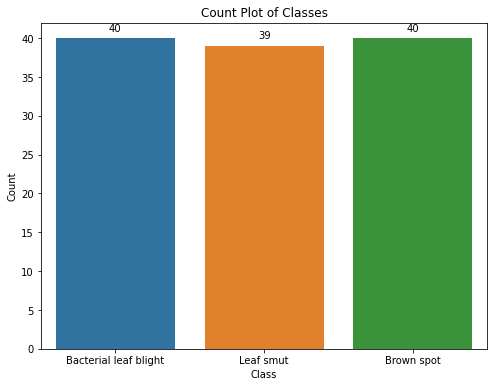

Random sample of images from 3 different class: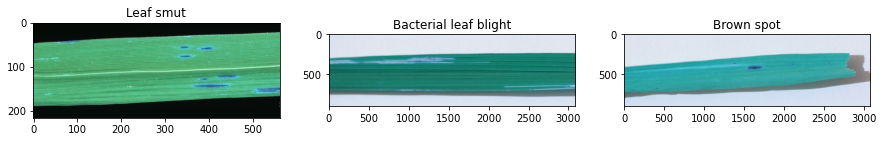

# Project Pipeline:
1. Importing Libraries
2. Basic Checks of raw data
3. Data Preprocessing and loading for training and testing
4. Model Building
5. Model Training
6. Checking the model performance

### 1. Importing Libraries
All the required libraries are imported.

### 2. Basic Checks of dataset
1. Found that there are 28 unique image sizes in train data and 6 unique image sizes in test data making a total of 34 unique image sizes in the dataset. 
2. There are 3 classes each in train folder and test folders namely,bacterial blight,brown spot and leaf smut.
3. There are a total of 119 images with 95 train images and 24 test images.
4. Plotted image count in each class.
5. Displayed random images from each class.


### 3. Data Preprocessing and loading for training and testing
1. Size of the loaded images are set to (299,299).
2. Data augmentation and pixel rescaling is done on training data while its loaded.
3. Only pixel rescaling is done on test data.

### 4. Model Building
* A CNN model is built using a Transfer Learning architecture called Inception V3. It works well with input size of (299,299). Inception v3 model is pre-trained on millions of image data (eg: ImageNet dataset) and has been widely used for image classification and object recognition tasks.
* Loss Function used is categorical_crossentropy
* Optimizer used in Adam

### 5. Model Training
Model is trained on augmented training data for 20 epochs. A good test accuracy of above 90% is shown.

### 6. Checking the model performance
* Training vs Validation Accuracy and Training vs Validation Loss are plotted.

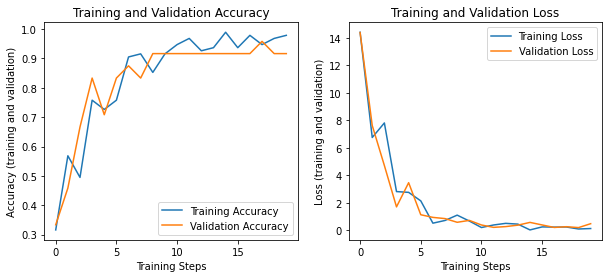




* Predicted random 5 test data.

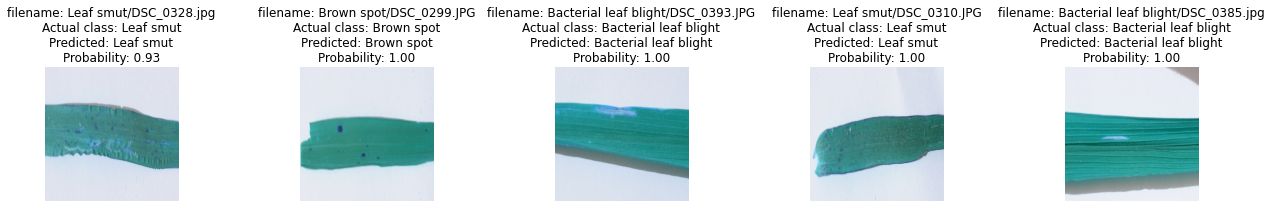

# Data Augmentation Analysis

Data augmentation is a technique used in machine learning, particularly in computer vision tasks, to artificially increase the diversity of the training dataset by applying various transformations to the existing images. The goal is to improve the generalization ability of the model and reduce overfitting. 

In Tensorflow and keras environment we use ' ImageDataGenerator' class to adjust variuos data augmentation parameters.

To visualise it, a random image from dataset is chosen and augmented it and both the images are shown.

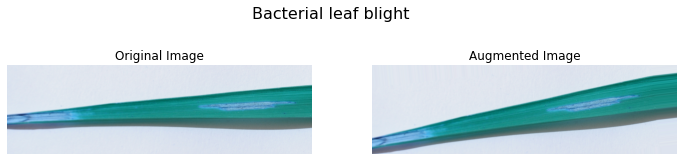

# Project Implementation

## Loading libraries

In [36]:
pip install opencv-python

     |████████████████████████████████| 55.7 MB 104 kB/s  eta 0:00:01   |█                               | 1.9 MB 5.3 MB/s eta 0:00:11     |████████▏                       | 14.1 MB 5.3 MB/s eta 0:00:08
Note: you may need to restart the kernel to use updated packages.


In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
import pathlib
from pathlib import Path
import cv2
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from glob import glob
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.10.0
Eager mode:  True
Hub version:  0.16.0.dev
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


## Basic checks

In [3]:
train_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train'
test_path = '/Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Test'

### Finding Unique image sizes and classes in TRAIN data
### Listing size and class of all TRAIN data.

In [4]:
i=-1
images=[]
classes = []
image_sizes = []


# Iterate through each class directory
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through images in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            
            # Get the image size
            if image is not None:
                i=i+1
                image_size = image.shape[:2]  # Assuming (height, width, channels), so [:2] gives (height, width)
                # Print the image size and class name
                print(f"{i}. Image size: {image_size}, Class: {class_name}")
                (width, height) = image.shape[1], image.shape[0]
                image_sizes.append((width, height))
                classes.append(class_name)
                images.append(image)
            else:
                print(f"Not an image: {image_path}")

# Return only unique image sizes
unique_sizes = list(set(image_sizes))
unique_classes= list(set(classes))



0. Image size: (897, 3081), Class: Bacterial leaf blight
1. Image size: (897, 3081), Class: Bacterial leaf blight
2. Image size: (897, 3081), Class: Bacterial leaf blight
3. Image size: (897, 3081), Class: Bacterial leaf blight
4. Image size: (897, 3081), Class: Bacterial leaf blight
5. Image size: (897, 3081), Class: Bacterial leaf blight
Not an image: /Users/munawira/06-FEB_Python/projects/Rice_Leaf/Divided_Leaf_Data/Train/Bacterial leaf blight/.DS_Store
6. Image size: (897, 3081), Class: Bacterial leaf blight
7. Image size: (897, 3081), Class: Bacterial leaf blight
8. Image size: (897, 3081), Class: Bacterial leaf blight
9. Image size: (897, 3081), Class: Bacterial leaf blight
10. Image size: (897, 3081), Class: Bacterial leaf blight
11. Image size: (897, 3081), Class: Bacterial leaf blight
12. Image size: (897, 3081), Class: Bacterial leaf blight
13. Image size: (897, 3081), Class: Bacterial leaf blight
14. Image size: (897, 3081), Class: Bacterial leaf blight
15. Image size: (897,

In [5]:
# x and y are the array of train images and classes respectively
x = np.array(images)
print(f'No. of images in train data: {x.shape[0]}')
y= np.array(classes)
print(y.shape)


No. of images in train data: 95
(95,)


<ipython-input-5-54f0ae8ebbeb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(images)


### Displaying Unique image sizes and class in TRAIN data

In [6]:
print(f"Unique sizes in train data: \n\n{unique_sizes}")

print(f"\nUnique classes in train data: \n\n{unique_classes}")

Unique sizes in train data: 

[(503, 174), (367, 73), (562, 217), (763, 268), (946, 255), (768, 514), (427, 193), (296, 88), (699, 197), (467, 104), (1504, 323), (948, 233), (311, 170), (286, 92), (359, 168), (565, 233), (741, 291), (250, 200), (765, 224), (614, 409), (766, 250), (301, 71), (376, 80), (456, 124), (1480, 279), (948, 211), (3081, 897), (1530, 371)]

Unique classes in train data: 

['Brown spot', 'Bacterial leaf blight', 'Leaf smut']


In [7]:
print(f'No. of unique sizes in train data: {len(unique_sizes)}')
print(f'No. of classes in train data: {len(unique_classes)}')

No. of unique sizes in train data: 28
No. of classes in train data: 3


### Finding Unique image sizes and classes in TEST data
### Listing size and class of all TEST data

In [8]:
image_sizes_test=[]
classes_test=[]

# Iterate through each class directory
for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through images in the class directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            
            # Get the image size
            if image is not None:
                i=i+1
                image_size = image.shape[:2]  # Assuming (height, width, channels), so [:2] gives (height, width)
                # Print the image size and class name
                print(f"{i}. Image size: {image_size}, Class: {class_name}")
                (width, height) = image.shape[1], image.shape[0]
                
                image_sizes_test.append((width, height))
                classes_test.append(class_name)
                
                image_sizes.append((width, height))
                classes.append(class_name)
                
                images.append(image)
            else:
                print(f"Error reading image: {image_path}")

# Return only unique sizes and classes in test data
unique_sizes_test = list(set(image_sizes_test))
unique_classes_test= list(set(classes_test))

# Return only unique image sizes in both train and test data
unique_sizes = list(set(image_sizes))
unique_classes= list(set(classes))

95. Image size: (897, 3081), Class: Bacterial leaf blight
96. Image size: (897, 3081), Class: Bacterial leaf blight
97. Image size: (897, 3081), Class: Bacterial leaf blight
98. Image size: (897, 3081), Class: Bacterial leaf blight
99. Image size: (897, 3081), Class: Bacterial leaf blight
100. Image size: (897, 3081), Class: Bacterial leaf blight
101. Image size: (897, 3081), Class: Bacterial leaf blight
102. Image size: (897, 3081), Class: Bacterial leaf blight
103. Image size: (897, 3081), Class: Leaf smut
104. Image size: (897, 3081), Class: Leaf smut
105. Image size: (897, 3081), Class: Leaf smut
106. Image size: (897, 3081), Class: Leaf smut
107. Image size: (200, 250), Class: Leaf smut
108. Image size: (216, 537), Class: Leaf smut
109. Image size: (383, 510), Class: Leaf smut
110. Image size: (897, 3081), Class: Leaf smut
111. Image size: (897, 3081), Class: Brown spot
112. Image size: (900, 1200), Class: Brown spot
113. Image size: (897, 3081), Class: Brown spot
114. Image size:

 ### Displaying Unique image sizes and class in Test data

In [9]:
print(f"Unique sizes in test data: \n{unique_sizes_test}")

print(f"\nUnique classes in test data: \n{unique_classes_test}")

Unique sizes in test data: 
[(537, 216), (1200, 900), (510, 383), (340, 94), (617, 244), (3081, 897), (250, 200), (316, 127)]

Unique classes in test data: 
['Brown spot', 'Bacterial leaf blight', 'Leaf smut']


In [10]:
# x and y are the array of total images and classes respectively
x = np.array(images)
print(f'No. of total images in the dataset: {x.shape[0]}')
y= np.array(classes)
print(y.shape)

No. of total images in the dataset: 119
(119,)


<ipython-input-10-845b9378d1ee>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(images)


In [11]:
print(f'No. of unique sizes in both test and train data: {len(unique_sizes)}')
print(f'No. of classes in both test and train data: {len(unique_classes)}')

No. of unique sizes in both test and train data: 34
No. of classes in both test and train data: 3


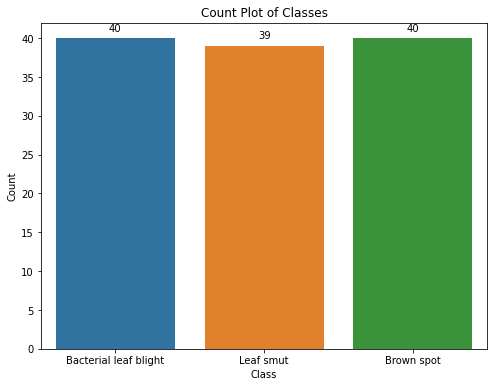

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 6))
ax=sns.countplot(x=y)
plt.title('Count Plot of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate each bar with the exact count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Displaying Random images from 3 different class.

selected indices:[42, 72, 8]


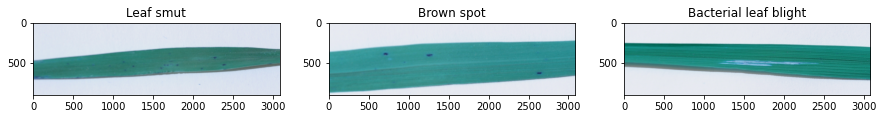

In [35]:
# Initialize an empty list to store selected items
selected_class = []
selected_cls_indices = []

# Choose 3 random unique items and get their indices
while len(selected_class) < 3:
    index = random.randint(0, len(y) - 1)
    item = y[index]

    # Check if the item is not already selected
    if item not in selected_class:
        selected_class.append(item)
        selected_cls_indices.append(index)

print(f'selected indices:{selected_cls_indices}')
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for n in range(0,3):
    ax[n].imshow(x[selected_cls_indices[n]])
    ax[n].set_title(selected_class[n])
    

## Data Loading and Preprocessing

In [16]:
# re-size all the images to this
IMAGE_SIZE = (299, 299)


In [17]:
# Use the Image Data Generator to import the augmented images from the dataset. Augmentation is done only on train data

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialized for the image size of inception v3
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 95 images belonging to 3 classes.


In [19]:
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [20]:
class_num=len(training_set.class_indices)
class_num

3

In [21]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [22]:
test_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

## Model Building using Inception V3 (Transfer Learning Architecture)

In [23]:
# Using Transfer Learning - inception V3

inception = InceptionV3(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

In [24]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [25]:
flattened_inception_output = Flatten()(inception.output)

In [26]:
prediction = Dense(class_num, activation='softmax')(flattened_inception_output)

In [27]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [28]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

### Specify Loss Function and Optimizer

In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  metrics=['accuracy']
)

## Model Training

In [30]:
history = model.fit(
  training_set,
  steps_per_epoch=len(training_set),
  validation_data=test_set,
  validation_steps=len(test_set),
  epochs=20
  )

Epoch 1/20
3/3 [==============================] - 29s 9s/step - loss: 21.3298 - accuracy: 0.3579 - val_loss: 22.2620 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 19s 6s/step - loss: 10.6485 - accuracy: 0.5474 - val_loss: 11.6954 - val_accuracy: 0.5833
Epoch 3/20
3/3 [==============================] - 21s 7s/step - loss: 13.5836 - accuracy: 0.6316 - val_loss: 6.5984 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 20s 7s/step - loss: 5.1779 - accuracy: 0.7158 - val_loss: 6.6864 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 20s 7s/step - loss: 6.0548 - accuracy: 0.7158 - val_loss: 7.5136 - val_accuracy: 0.5833
Epoch 6/20
3/3 [==============================] - 21s 7s/step - loss: 2.4044 - accuracy: 0.7684 - val_loss: 4.5024 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 21s 7s/step - loss: 2.8267 - accuracy: 0.8316 - val_loss: 4.1080 - val_accuracy: 0.7917
Epoch 8/20
3/3 [=============

## Checking the model performance

### Plot the Performance

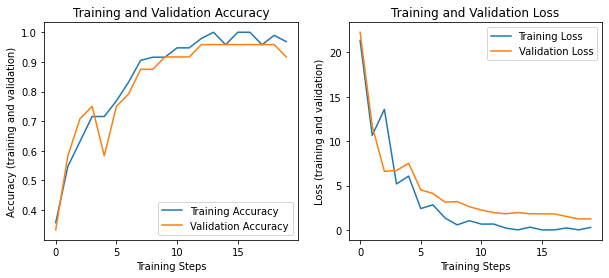

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

### Testing model using random 5 test images

In [32]:
classes=list(test_set.class_indices.keys())
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 0s 215ms/step


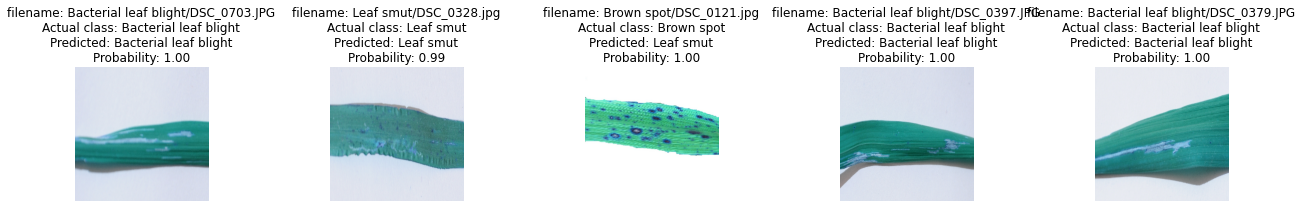

In [33]:
# Create a single figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 3))

for i, filename in enumerate(random.sample(test_set.filenames, 5)):
    #print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    cls=os.path.split(filename)[0]
    file=filename
    
    img = cv2.imread(os.path.join(test_path, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img / 255
    
    probabilities = model.predict(np.expand_dims(img, axis=0))[0]
    class_idx = np.argmax(probabilities)
    
    #print("PREDICTED: class: %s, probability: %f" % (classes[class_idx], probabilities[class_idx]))
    
    # Display the image in the corresponding subplot
    axes[i].imshow(img)
    axes[i].set_title(f'filename: {file}\nActual class: {cls}\nPredicted: {classes[class_idx]}\nProbability: {probabilities[class_idx]:.2f}')
    axes[i].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

# Analyzing Data Augmentation on a random leaf image


random index: 16


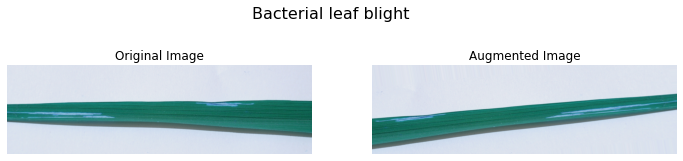

In [37]:
rand_index=random.randint(0,118)
random_img=x[rand_index]
print(f"random index: {rand_index}")

# resizing to (299,299) for augmentation
# img_for_aug = cv2.resize(random_img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
# img_array = np.asarray([img_for_aug])

# Convert image to NumPy array adding batch dimension
img_array = np.asarray([random_img])

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = datagen.flow(img_array, batch_size=1)

fig = plt.figure(figsize=(12, 3))
fig.suptitle(y[rand_index], fontsize=16)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(random_img)
plt.title('Original Image')
plt.axis('off')

# Display the augmented image
plt.subplot(1, 2, 2)
augmented_image = augmented_images.next()[0]
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

# Show the plot
plt.show()